# Course 1, Week 2

In [57]:
from Bio.Seq import Seq
from skbio.sequence.distance import hamming
from skbio.sequence import Sequence
import matplotlib.pyplot as plt
import numpy as np

In [16]:
seq1=Sequence('CTTGAAGTGGACCTCTAGTTCCTCTACAAAGAACAGGTTGACCTGTCGCGAAG')
seq2=Sequence('ATGCCTTACCTAGATGCAATGACGGACGTATTCCTTTTGCCTCAACGGCTCCT')

In [35]:
hamming(seq1,seq2)*len(seq1)

43.0

In [53]:
def calc_hamming(seq1,seq2):
    hamm=0
    zp=zip(seq1,seq2)
    for u,v in zp:
        if u!=v:
            hamm+=1
    return hamm
seq1='TGACCCGTTATGCTCGAGTTCGGTCAGAGCGTCATTGCGAGTAGTCGTTTGCTTTCTCAAACTCC'
seq2='GAGCGATTAAGCGTGACAGCCCCAGGGAACCCACAAAACGTGATCGCAGTCCATCCGATCATACA'
hamm=calc_hamming(seq1,seq2)
print(hamm)

50


14
[0, -1, -1, -1, -1, -2, -3, -3, -2, -2, -2, -3, -3, -3, -4, -3, -3, -3, -2, -2, -2, -1, 0, -1, 0, 0, 1, 1, 1, 2]


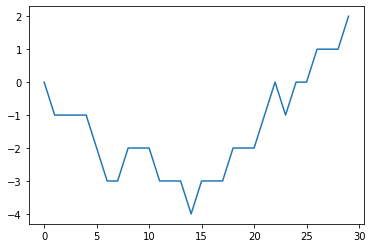

In [58]:
def skew(sequence):
    gc_skew_lst=[]
    #G-C
    for i in range(0,len(sequence)):
        sub_seq=Seq(sequence[:i])
        Gs=sub_seq.count('G')
        Cs=sub_seq.count('C')
        gc_skew_lst.append(Gs-Cs)
    return gc_skew_lst
sequence='CATTCCAGTACTTCGATGATGGCGTGAAGA'
gc_skew_lst=skew(sequence)
print(np.argmin(gc_skew_lst))
print(gc_skew_lst)
plt.plot(gc_skew_lst)

In [59]:
def approximate_count(sequence,pattern,d=2):
    matches=0
    for i in range(len(sequence)-len(pattern)):
        sub=sequence[i:i+len(pattern)]
        mismatch_score=0
        zp=zip(sub,pattern)
        for u,v in zp:
            if u!=v:
                mismatch_score+=1
        if mismatch_score<=d:
            matches+=1
    return matches

approximate_count('CATGCCATTCGCATTGTCCCAGTGA','CCC',2)

15

In [ ]:
def find_all_d_kmers(sequence):
    